**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_openml
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree
%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [18]:
##%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.k_neighbors = n_neighbors
        self.algorithm = algorithm

    def distance(self, X, Y):
        x_distance = np.sum(X ** 2, axis=1).reshape(1, -1)
        y_distance = np.sum(Y ** 2, axis=1).reshape(-1, 1)
        distance = (x_distance - 2 * np.matmul(Y, X.T) + y_distance)
        return distance

    def fit(self, X, y):
        if self.algorithm == 'brute':
            self.features = np.asarray(X)
            self.target = np.asarray(y, dtype=int)
        elif self.algorithm == 'kd_tree':
            self.tree = KDTree(X)
            self.target = np.asarray(y, dtype=int)
        else:
            raise ValueError("Unknown algorithm")
        self.classes = np.unique(self.target)

    def get_classes(self):
        return self.classes

    def kneighbors(self, X):
        if self.algorithm == 'brute':
            distance = self.distance(self.features, X)
            k_index = np.argpartition(distance, self.k_neighbors)
            k_index = k_index[:, :self.k_neighbors]
        elif self.algorithm == 'kd_tree':
            distance, k_index = self.tree.query(X, k=self.k_neighbors)
        return k_index

    def predict(self, X):
        predictions = np.zeros(X.shape[0], dtype=int)
        k_classes = self.target[self.kneighbors(X)]
        for sample_index, sample in enumerate(self.kneighbors(X)):
            predictions[sample_index] = stats.mode(
                                    self.target[np.array(sample)]
                                    ).mode[0]
        return predictions

    def predict_proba(self, X):
        predictions = np.zeros((X.shape[0], self.classes.shape[0]))
        k_classes = self.target[self.kneighbors(X)]
        for i in range(k_classes.shape[0]):
            for j in k_classes[i]:
                predictions[i][j] += 1
        predictions /= self.k_neighbors
        return predictions

    def score(self, X, y):
        target, y = self.predict(X), np.asarray(y, dtype=int)
        return np.average(target == y)

**IRIS**

In [35]:
iris = datasets.load_iris()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [37]:
clf = KNeighborsClassifier(n_neighbors=3, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=3)

In [38]:
%time clf.fit(X_train, y_train)

Wall time: 0 ns


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [39]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [40]:
%time clf.predict(X_test)

Wall time: 1 ms


array([2, 2, 2, 0, 1, 2, 2, 0, 1, 1, 0, 1, 1, 0, 0])

In [41]:
%time my_clf.predict(X_test)

Wall time: 3 ms


array([2, 2, 2, 0, 1, 2, 2, 0, 1, 1, 0, 1, 1, 0, 0])

In [42]:
%time clf.predict_proba(X_test)

Wall time: 999 µs


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [43]:
%time my_clf.predict_proba(X_test)

Wall time: 0 ns


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [44]:
clf.score(X_test, y_test)

1.0

In [45]:
my_clf.score(X_test, y_test)

1.0

Задание 3

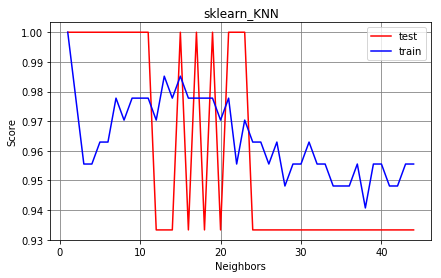

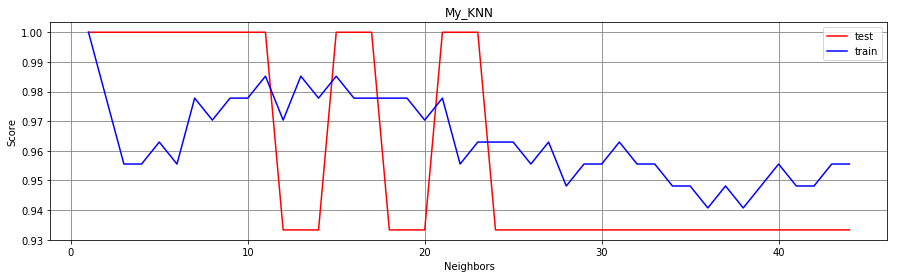

Best n =  22


In [46]:
##%%pycodestyle
%matplotlib inline


def score_calculate(classifier, X_train, y_train, X_test, y_test, k):
    clf = classifier(k)
    clf.fit(X_train, y_train)
    return clf.score(X_test, y_test)


N = 45
my_train_scores = np.zeros(N - 1)
my_test_scores = np.zeros(N - 1)
sk_train_scores = np.zeros(N - 1)
sk_test_scores = np.zeros(N - 1)
for k in range(1, N):
    my_train_scores[k - 1] = score_calculate(MyKNeighborsClassifier,
                                             X_train, y_train,
                                             X_train, y_train, k)
    my_test_scores[k - 1] = score_calculate(MyKNeighborsClassifier,
                                            X_train, y_train,
                                            X_test, y_test, k)
    sk_train_scores[k - 1] = score_calculate(KNeighborsClassifier,
                                             X_train, y_train,
                                             X_train, y_train, k)
    sk_test_scores[k - 1] = score_calculate(KNeighborsClassifier,
                                            X_train, y_train,
                                            X_test, y_test, k)

plt.subplot(1, 2, 1)

plt.title("sklearn_KNN")
plt.plot(range(1, N), sk_test_scores, label="test", color="red")
plt.plot(range(1, N), sk_train_scores, label="train", color="blue")
plt.xlabel('Neighbors')
plt.ylabel('Score')
plt.legend()
plt.grid(color="grey")
fig = plt.gcf()
fig.set_figwidth(15)
plt.show()
plt.title("My_KNN")
plt.plot(range(1, N), my_test_scores, label="test", color="red")
plt.plot(range(1, N), my_train_scores, label="train", color="blue")
plt.xlabel('Neighbors')
plt.ylabel('Score')
plt.legend()
plt.grid(color="grey")

fig = plt.gcf()
fig.set_figwidth(15)
plt.show()
Best_k = np.max(np.where(my_test_scores == np.max(my_test_scores)))
print("Best n = ", Best_k)

**MNIST**

In [47]:
mnist = fetch_openml('mnist_784')

In [48]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [49]:
clf = KNeighborsClassifier(n_neighbors=5)
my_clf = MyKNeighborsClassifier(n_neighbors=5)

In [50]:
%time clf.fit(X_train, y_train)

Wall time: 45.4 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [51]:
%time my_clf.fit(X_train, y_train)

Wall time: 8.01 ms


In [52]:
%time clf.predict(X_test)

Wall time: 54.6 s


array(['9', '2', '7', '2', '5', '0', '1', '3', '3', '4', '6', '2', '8',
       '9', '9', '7', '0', '4', '2', '5', '2', '9', '0', '3', '9', '9',
       '9', '9', '3', '5', '5', '2', '6', '3', '0', '5', '3', '6', '7',
       '9', '7', '1', '8', '3', '5', '1', '5', '7', '4', '3', '7', '2',
       '8', '5', '4', '6', '5', '1', '8', '3', '7', '8', '2', '6', '3',
       '4', '1', '9', '6', '0', '6', '4', '5', '3', '6', '6', '0', '7',
       '8', '8', '6', '6', '4', '4', '6', '1', '0', '6', '6', '5', '0',
       '3', '9', '7', '2', '8', '6', '0', '3', '7', '5', '6', '6', '7',
       '4', '5', '8', '5', '2', '5', '4', '4', '6', '0', '4', '2', '3',
       '5', '5', '0', '0', '6', '1', '4', '6', '7', '6', '8', '8', '0',
       '4', '4', '2', '1', '5', '6', '7', '2', '0', '2', '7', '8', '2',
       '0', '5', '2', '1', '3', '3', '7', '3', '6', '2', '4', '9', '9',
       '0', '1', '1', '2', '2', '7', '1', '1', '5', '9', '1', '1', '7',
       '9', '0', '7', '4', '6', '4', '9', '8', '7', '2', '3', '4

In [53]:
%time my_clf.predict(X_test)

Wall time: 6.13 s


array([9, 2, 7, 2, 5, 0, 1, 3, 3, 4, 6, 2, 8, 9, 9, 7, 0, 4, 2, 5, 2, 9,
       0, 3, 9, 9, 9, 9, 3, 5, 5, 2, 6, 3, 0, 5, 3, 6, 7, 9, 7, 1, 8, 3,
       5, 1, 5, 7, 4, 3, 7, 2, 8, 5, 4, 6, 5, 1, 8, 3, 7, 8, 2, 6, 3, 4,
       1, 9, 6, 0, 6, 4, 5, 3, 6, 6, 0, 7, 8, 8, 6, 6, 4, 4, 6, 1, 0, 6,
       6, 5, 0, 3, 9, 7, 2, 8, 6, 0, 3, 7, 5, 6, 6, 7, 4, 5, 8, 5, 2, 5,
       4, 4, 6, 0, 4, 2, 3, 5, 5, 0, 0, 6, 1, 4, 6, 7, 6, 8, 8, 0, 4, 4,
       2, 1, 5, 6, 7, 2, 0, 2, 7, 8, 2, 0, 5, 2, 1, 3, 3, 7, 3, 6, 2, 4,
       9, 9, 0, 1, 1, 2, 2, 7, 1, 1, 5, 9, 1, 1, 7, 9, 0, 7, 4, 6, 4, 9,
       8, 7, 2, 3, 4, 8, 1, 9, 8, 0, 4, 6, 8, 9, 8, 2, 1, 3, 4, 7, 1, 0,
       8, 0, 1, 2, 6, 0, 3, 3, 5, 5, 2, 3, 7, 2, 7, 9, 8, 5, 1, 2, 6, 3,
       9, 0, 3, 2, 9, 3, 7, 8, 2, 4, 8, 2, 8, 0, 0, 5, 4, 1, 8, 5, 2, 1,
       4, 9, 8, 5, 9, 6, 9, 6, 0, 1, 3, 2, 0, 9, 8, 9, 1, 6, 5, 6, 4, 8,
       2, 7, 5, 5, 3, 9, 1, 0, 0, 5, 2, 8, 4, 1, 4, 0, 6, 3, 9, 1, 2, 3,
       8, 8, 0, 0, 4, 3, 1, 5, 3, 4, 6, 2, 2, 1, 8,

In [54]:
%time clf.predict_proba(X_test)

Wall time: 54.6 s


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [55]:
 %time my_clf.predict_proba(X_test)

Wall time: 3.15 s


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [56]:
clf.score(X_test, y_test)

0.9742857142857143

In [57]:
my_clf.score(X_test, y_test)

0.9742857142857143

Задание 4

In [58]:
clf = KNeighborsClassifier(n_neighbors=Best_k, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=Best_k, algorithm='kd_tree')

In [59]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [60]:
%time clf.fit(X_train, y_train)

Wall time: 45.2 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=22, p=2,
           weights='uniform')

In [61]:
%time my_clf.fit(X_train, y_train)

Wall time: 44.9 s


In [62]:
%time clf.predict(X_test)

Wall time: 55.2 s


array(['3', '8', '1', '8', '0', '7', '2', '2', '0', '6', '6', '4', '4',
       '7', '1', '1', '0', '6', '1', '5', '7', '6', '9', '2', '0', '9',
       '1', '6', '4', '7', '3', '1', '6', '8', '5', '9', '7', '0', '7',
       '4', '3', '8', '0', '4', '0', '2', '0', '0', '1', '3', '5', '6',
       '1', '1', '2', '4', '3', '8', '2', '8', '4', '8', '6', '9', '4',
       '2', '6', '5', '1', '0', '4', '1', '5', '7', '5', '5', '7', '3',
       '3', '5', '5', '1', '3', '4', '7', '5', '1', '4', '4', '6', '2',
       '1', '3', '2', '4', '8', '1', '9', '9', '6', '3', '0', '5', '7',
       '9', '1', '7', '6', '6', '4', '1', '5', '0', '9', '0', '4', '4',
       '1', '7', '9', '3', '4', '3', '1', '5', '9', '9', '2', '1', '5',
       '2', '7', '9', '3', '2', '9', '4', '6', '1', '6', '6', '6', '9',
       '4', '7', '0', '4', '0', '3', '3', '1', '3', '8', '6', '9', '7',
       '6', '8', '6', '2', '1', '5', '2', '1', '8', '9', '0', '6', '0',
       '3', '1', '5', '6', '3', '2', '6', '1', '5', '5', '0', '1

In [63]:
%time my_clf.predict(X_test)

Wall time: 1min 27s


array([3, 8, 1, 8, 0, 7, 2, 2, 0, 6, 6, 4, 4, 7, 1, 1, 0, 6, 1, 5, 7, 6,
       9, 2, 0, 9, 1, 6, 4, 7, 3, 1, 6, 8, 5, 9, 7, 0, 7, 4, 3, 8, 0, 4,
       0, 2, 0, 0, 1, 3, 5, 6, 1, 1, 2, 4, 3, 8, 2, 8, 4, 8, 6, 9, 4, 2,
       6, 5, 1, 0, 4, 1, 5, 7, 5, 5, 7, 3, 3, 5, 5, 1, 3, 4, 7, 5, 1, 4,
       4, 6, 2, 1, 3, 2, 4, 8, 1, 9, 9, 6, 3, 0, 5, 7, 9, 1, 7, 6, 6, 4,
       1, 5, 0, 9, 0, 4, 4, 1, 7, 9, 3, 4, 3, 1, 5, 9, 9, 2, 1, 5, 2, 7,
       9, 3, 2, 9, 4, 6, 1, 6, 6, 6, 9, 4, 7, 0, 4, 0, 3, 3, 1, 3, 8, 6,
       9, 7, 6, 8, 6, 2, 1, 5, 2, 1, 8, 9, 0, 6, 0, 3, 1, 5, 6, 3, 2, 6,
       1, 5, 5, 0, 1, 3, 6, 7, 0, 7, 7, 2, 0, 7, 0, 4, 9, 3, 8, 5, 4, 6,
       4, 0, 6, 6, 6, 6, 4, 3, 1, 2, 7, 0, 0, 9, 2, 4, 8, 1, 9, 9, 4, 6,
       7, 1, 9, 1, 7, 6, 1, 1, 0, 7, 7, 2, 0, 5, 6, 3, 1, 0, 9, 3, 9, 6,
       4, 0, 7, 8, 5, 3, 8, 1, 7, 7, 8, 3, 2, 6, 3, 1, 0, 8, 8, 1, 6, 7,
       6, 8, 4, 2, 6, 4, 1, 2, 9, 2, 6, 1, 4, 0, 7, 1, 4, 7, 3, 7, 2, 4,
       3, 0, 9, 4, 8, 0, 2, 5, 5, 9, 9, 9, 0, 5, 1,

In [64]:
%time clf.predict_proba(X_test)

Wall time: 54.6 s


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.36363636, 0.        , ..., 0.13636364, 0.5       ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.04545455, 0.        ,
        0.        ]])

In [65]:
%time my_clf.predict_proba(X_test)

Wall time: 43.8 s


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.36363636, 0.        , ..., 0.13636364, 0.5       ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.04545455, 0.        ,
        0.        ]])

In [66]:
clf.score(X_test, y_test)

0.9628571428571429

In [67]:
my_clf.score(X_test, y_test)

0.9628571428571429

Задание 5

In [68]:
# seaborn это библиотека для визуализации данных основанная на matplotlib
# matplotlib библиотека с широкими возмоджностями визуализации данных
# train_test_split функция которая разделяет данные на тестовую и тренировочную часть в заданной пропорции. Данные по умолчанию перемешиваются
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) 'конвеер' для последовательной работы несокольких моделей.
# StandardScaler (from sklearn.preprocessing import StandardScaler) класс котоырй предоставляет возможность преоброзовать данные так, что срелнее будет равно 0, а стандартное отклонение 1.
# ClassifierMixin класс от которога наследуются все класификаторы в sklearn, в нем содержится метод score
# NeighborsBase базовый класс для моделей использующих метод k-ближайших соседей
# KNeighborsMixin класс для поиска k ближайших соседей. В нем реализуется метод kneighbors который ищет k ближайших соседей(их индексы) и расстояния до них.
# SupervisedIntegerMixin класс в котором реализован метод fit для обучения с учителем.